## McCulloch-Pitts Neurons and Perceptron Learning - Longren

I apologize for not having the .pdf file attached as well. I tried but kept running into an error in not having the correct LaTeX files installed. Will have it correctly submitted for next week though.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import e

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### Problem 1: McCulloch-Pitts neuron

In [2]:
w = [3,2,2] #the given weights

#the always-on input and 
#the four possible combinations of x1,x2
in0 = -1  
in1 = [-1,-1]
in2 = [-1,1]
in3 = [1,-1]
in4 = [1,1]

def fy(x): #sign function
    
    print('x1:', x[0], ' x2:', x[1])
    
    x = (in0 * w[0]) + (x[0] * w[1]) + (x[1] * w[2]) #total input
   
    if x > 0:
        y = 1
        
    elif x < 0:
        y = -1
        
    elif x == 0:
        y = 0

    print('output:', y)
    
fy(in1)
fy(in2)
fy(in3)
fy(in4)

x1: -1  x2: -1
output: -1
x1: -1  x2: 1
output: -1
x1: 1  x2: -1
output: -1
x1: 1  x2: 1
output: 1


This result shows that the neuron is performing an AND function.

### Problem 2: Activation functions

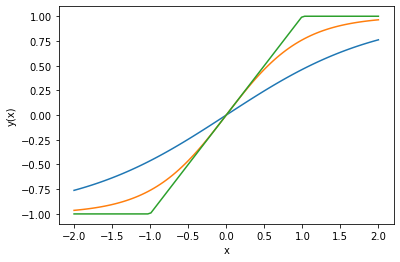

In [3]:
a = 1
b = 2
c = 100
x = np.linspace(-b,b,c)

#sigmoid function
f = (2 / (1 + e ** (-a * x))) - 1
plt.plot(x,f)

#hyperbolic tangent function
g = np.tanh(a * x)
plt.plot(x,g)

#piecewise linear function   
l = np.linspace(-b,b,c)

for i in range(c):
    if l[i] >= (int(1/a)):
        l[i] = 1
        
    elif l[i] <= (int(-1/a)):
        l[i] = -1
        
    else:
        l[i] = a * x[i]

plt.plot(x,l)

plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

If the variable *a* is chose such that it is very large, all three functions become the step function.

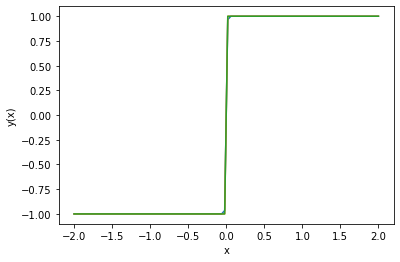

In [4]:
a = 200 #very large a

#sigmoid function
f = (2 / (1 + e ** (-a * x))) - 1
plt.plot(x,f)

#hyperbolic tangent function
g = np.tanh(a * x)
plt.plot(x,g)

#piecewise linear function   
l = np.linspace(-b,b,c)

for i in range(c):
    if l[i] >= (int(1/a)):
        l[i] = 1
        
    elif l[i] <= (int(-1/a)):
        l[i] = -1
        
    else:
        l[i] = a * x[i]

plt.plot(x,l)

plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

### Problem 3: Rosenblatt's perceptron

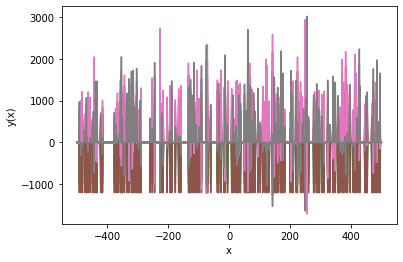

In [5]:
## a)

N = 1000 #size of the training set

x0 = [-1. for _ in range(N)] 
x1 = [np.random.normal() for _ in range(N)]
x2 = [np.random.normal() for _ in range(N)]

x = [x0,x1,x2] #input vector

d = [] #desired response empty array

for i in range (N): #defining desired response 

    if x[2][i] >= (0.5 - x[1][i]):
        d.append(1.)
        
    elif x[2][i] < (0.5 - x[1][i]):
        d.append(-1.)

d = np.array(d)

## b)

nu = 100 #learning rate (larger than 0)
w = [3.,2.,2.] #initial weight vector

fy = [] #neuron response empty array

for i in range(N): #determining fy for the McCulloch-Pitts neuron from exercise 1
        
    x = np.sum((np.dot(x0, w[0])) + (np.dot(x1[i], w[1])) + (np.dot(x2[i], w[2]))) #total input

    if x > 0:            
        
        y = 1
        fy.append(y)

    elif x < 0:
        
        y = -1
        fy.append(y)
    
    elif x == 0:
        
        y = 0
        fy.append(y)

fy = np.array(fy)

wn = [] #empty new weight arrays
wo = [] #empty old weight array
x = [x0,x1,x2] #input vector from a)

for _ in range(N): #creating many emptyarrays
    
    wo0 = [3.,2.,2.]
    wn0 = []
    
    wo.append(wo0)
    wn.append(wn0)

y = np.linspace(-N/2,N/2,N)
def lifting(): #defining one epoch
    
    for j in range(3): #computing the new weights for each column

        for i in range(N): #computing the new weights
            
            wn2 = wo[i][j] + nu * (d[i] - fy[i]) * x[j][i] #error-correction update rule
 
            wn[i].append(wn2) 
    
    plt.plot(y,wn)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    
    
lifting() #the initial epoch

n = 5 #define number of epochs
    
for _ in range(n): #for loop to run multiple epochs
    
    wo = wn
    wn = []

    for _ in range(N): #creating many emptyarrays

        wn0 = []
    
        wn.append(wn0)

    lifting()
    


##c)d)

Wasn't able to get the neuron able to train again on a new set correctly.
However, the idea is that the weight vectors should be perpendicular to the decision boundary of the training data.

### Problem 4: Linear separability

In [6]:
## a)


By providing the cell a certain desired response *d(x)* of the XOR truth table, ideally one would be able to train the cell to become that logic gate.

In [7]:
## b)


The Rosenblatt perceptron should not converge while training, so there will be an ideal epoch number in order to get the desired response of the XOR logic gate

In [8]:
## c)


When plotted on a Euclidian plane, one would find that the problem is not linearly seperable as a line cannot be drawn between the binary categories of outputs.